In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [5]:
url_data = "https://github.com/ahlraf/btp-transfer-learning/blob/master/processed-data/suicide_vs_depression.csv?raw=true"
df = pd.read_csv(url_data, names=["text","label"], skip_blank_lines=True, encoding="utf-8")

In [6]:
df.isna().sum()  # check for null values

text     0
label    0
dtype: int64

In [9]:
df_depression = df[df.label=='0']
df_suicidal = df[df.label=='1']

In [11]:
text_depression = ' '.join(x for x in df_depression["text"])
text_suicidal = ' '.join(x for x in df_suicidal["text"])

In [25]:
wc_depression = WordCloud(stopwords=stop, collocations=True).generate(text_depression)
wc_suicidal = WordCloud(stopwords=stop, collocations=True).generate(text_suicidal)

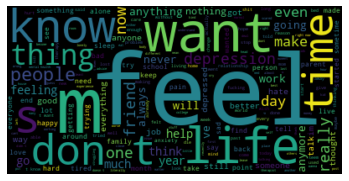

In [14]:
plt.imshow(wc_depression, interpolation="bilinear")
plt.axis("off")
plt.show()

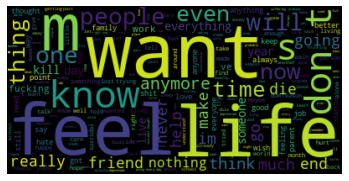

In [15]:
plt.imshow(wc_suicidal, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
# create a dictionary of word frequencies
text_dictionary = wc_depression.process_text(text_depression)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wc_depression.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('feel', 1408), ('m', 841), ('want', 780), ('life', 780), ('know', 642)]
[('feel', 1.0), ('m', 0.5973011363636364), ('want', 0.5539772727272727), ('life', 0.5539772727272727), ('know', 0.4559659090909091)]


In [18]:
# create a dictionary of word frequencies
text_dictionary = wc_suicidal.process_text(text_suicidal)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wc_suicidal.words_

#print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('want', 884), ('feel', 773), ('life', 770), ('m', 684), ('know', 530)]
[('want', 1.0), ('feel', 0.8744343891402715), ('life', 0.8710407239819005), ('m', 0.7737556561085973), ('know', 0.5995475113122172)]


In [34]:
stop = STOPWORDS.update(['want', 'feel', 'life', 'know', 'm', 'don', 't', 'even', 's', 'will'])

In [35]:
wc_depression = WordCloud(stopwords=stop, collocations=True).generate(text_depression)
wc_suicidal = WordCloud(stopwords=stop, collocations=True).generate(text_suicidal)

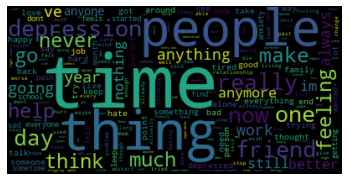

In [36]:
plt.imshow(wc_depression, interpolation="bilinear")
plt.axis("off")
plt.show()

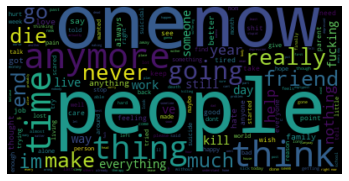

In [37]:
plt.imshow(wc_suicidal, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
labels = ["0", "1"]
corpus = [' '.join(df[(df.label==label)].text.tolist()) for label in labels]
cv = CountVectorizer( stop_words=stop, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow = pd.DataFrame(X, columns = cv.get_feature_names())
bow.index = labels

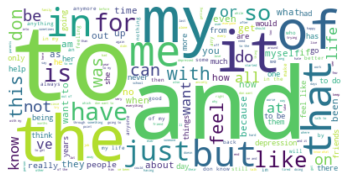

In [42]:
text=bow.loc['0'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['0'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3, background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

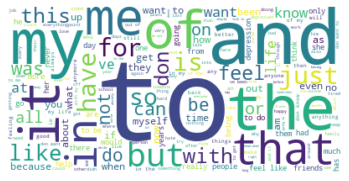

In [43]:
text=bow.loc['1'].sort_values(ascending=False)[:4000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['0'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3, background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
from tqdm import tqdm #used for progress bar
import math

#build an empty dataframe
t_bow_df=pd.DataFrame()

# By candidate, divide the number of times a word is said, 
# by the total number of times they've said all the words that they have said (frequency)
bow_transformed = bow.apply(lambda x: (x+1)/ (bow.loc[x.name].sum()+1), axis=1) 

for label in tqdm(labels):
    feat_s = bow[bow.index != label].sum()+1 #sum all the times each word was said excluding the candidate
    feat_s_all = np.sum(bow[bow.index != label].sum()) # all the total words that were said, excluding the candidate
    tot = feat_s / feat_s_all #find the frequency of words said among other candidates
    row = bow_transformed.loc[label] / tot #divide the candidate's array of frequency of words by all other candidates' frequency
    row = pd.DataFrame(row).T #create a df, and transform
    results = row.apply(lambda x: math.log(x,2)) #take the log of each frequency
    
    t_bow_df = pd.concat([t_bow_df, pd.DataFrame([results], index=[label])]) #append

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:54<00:00, 57.42s/it]
